In [1]:
import pandas as pd
import soccerdata as sd

[06/21/25 23:34:27] INFO     No custom team name replacements found. You can configure these in       ]8;id=384484;file:///Users/yannis/ylfc/venv/lib/python3.8/site-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=158281;file:///Users/yannis/ylfc/venv/lib/python3.8/site-packages/soccerdata/_config.py#84\84]8;;\
                             /Users/yannis/soccerdata/config/teamname_replacements.json.                           

                    INFO     Custom league dict loaded from                                          ]8;id=569584;file:///Users/yannis/ylfc/venv/lib/python3.8/site-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=611754;file:///Users/yannis/ylfc/venv/lib/python3.8/site-packages/soccerdata/_config.py#160\160]8;;\
                             /Users/yannis/soccerdata/config/league_dict.json.                                     

In [2]:
bg_color = "#1e1e2f"
primary_color = "#f4f4f4"
secondary_color = "#ff6f61"
third_color = "#ffc24a"

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'

In [4]:
sd.FBref.available_leagues()

['Big 5 European Leagues Combined',
 'ENG-Premier League',
 'ESP-La Liga',
 'FRA-Ligue 1',
 'FRA-Ligue-2',
 'GER-Bundesliga',
 "INT-Women's World Cup",
 'INT-World Cup',
 'ITA-Serie A',
 'NED-Eredivisie']

In [4]:
fbref = sd.FBref(leagues="FRA-Ligue-2", seasons="2425", no_cache=True, proxy={"http": "20.111.54.16"})
# fbref.read_schedule(force_cache=True)

# all_types = ["standard", "shooting", "passing", "passing_types", "goal_shot_creation", "defense", "possession", "playing_time", "misc", "keeper", "keeper_adv"]



[06/21/25 23:34:38] INFO     Saving cached data to /Users/yannis/soccerdata/data/FBref                ]8;id=903801;file:///Users/yannis/ylfc/venv/lib/python3.8/site-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=350332;file:///Users/yannis/ylfc/venv/lib/python3.8/site-packages/soccerdata/_common.py#89\89]8;;\

In [5]:
fbref

In [5]:
df = fbref.read_team_season_stats(stat_type='standard', opponent_stats=False)

In [9]:
df.columns

MultiIndex([(  'players_used',       ''),
            (           'Age',       ''),
            (          'Poss',       ''),
            (  'Playing Time',     'MP'),
            (  'Playing Time', 'Starts'),
            (  'Playing Time',    'Min'),
            (  'Playing Time',    '90s'),
            (   'Performance',    'Gls'),
            (   'Performance',    'Ast'),
            (   'Performance',    'G+A'),
            (   'Performance',   'G-PK'),
            (   'Performance',     'PK'),
            (   'Performance',  'PKatt'),
            (   'Performance',   'CrdY'),
            (   'Performance',   'CrdR'),
            ('Per 90 Minutes',    'Gls'),
            ('Per 90 Minutes',    'Ast'),
            ('Per 90 Minutes',    'G+A'),
            ('Per 90 Minutes',   'G-PK'),
            ('Per 90 Minutes', 'G+A-PK'),
            (           'url',       '')],
           )

In [34]:
df = df.reset_index()

In [38]:
print(df.index.names)      # Montre les noms des niveaux d'index
print(df.columns.tolist()) # Montre les colonnes classiques

[None]
[('league', ''), ('season', ''), ('team', ''), ('players_used', ''), ('Age', ''), ('Poss', ''), ('Playing Time', 'MP'), ('Playing Time', 'Starts'), ('Playing Time', 'Min'), ('Playing Time', '90s'), ('Performance', 'Gls'), ('Performance', 'Ast'), ('Performance', 'G+A'), ('Performance', 'G-PK'), ('Performance', 'PK'), ('Performance', 'PKatt'), ('Performance', 'CrdY'), ('Performance', 'CrdR'), ('Per 90 Minutes', 'Gls'), ('Per 90 Minutes', 'Ast'), ('Per 90 Minutes', 'G+A'), ('Per 90 Minutes', 'G-PK'), ('Per 90 Minutes', 'G+A-PK'), ('url', '')]


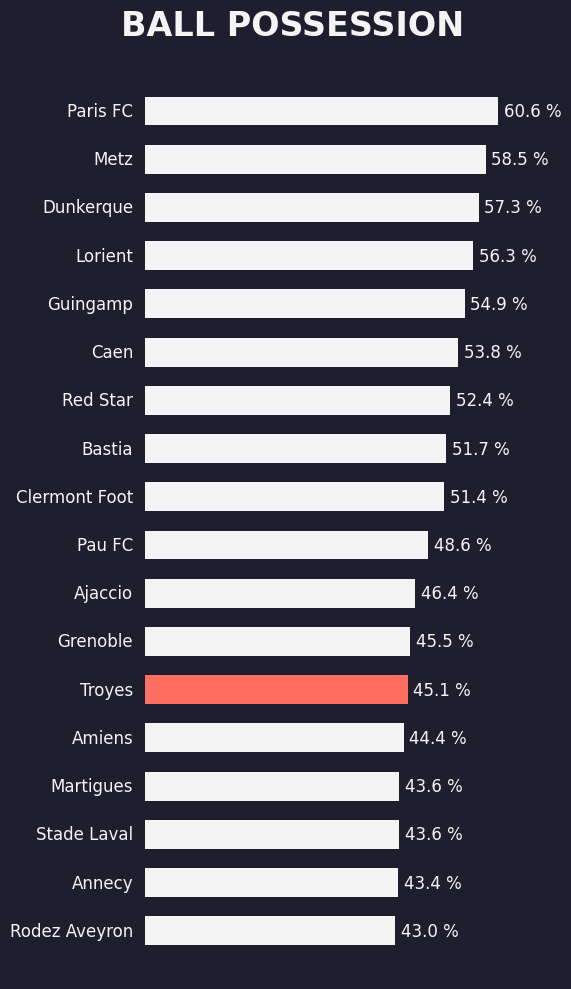

<Figure size 640x480 with 0 Axes>

In [62]:
import matplotlib.pyplot as plt

df_sorted = df.sort_values(by=('Poss', ''), ascending=False).set_index(('team', ''))

fig, ax = plt.subplots(figsize=(6, 10), facecolor=bg_color)
ax.set_facecolor(bg_color)
ax.axis('off')

bar_height = 0.6
bar_color_default = primary_color
bar_color_highlight = secondary_color  # Optionnel

for i, (team, row) in enumerate(df_sorted.iterrows()):
    value = row[('Poss', '')]
    color = bar_color_highlight if team == 'Troyes' else bar_color_default

    ax.barh(i, value, height=bar_height, color=color, edgecolor='none')

    ax.text(-2, i, team, va='center', ha='right', color=primary_color, fontsize=12)
    ax.text(value + 1, i, f"{value:.1f} %", va='center', color=primary_color, fontsize=12)

plt.title("BALL POSSESSION", fontsize=24, fontweight='bold', color=primary_color, pad=20)
ax.set_ylim(-1, len(df_sorted))
ax.set_xlim(-20, df_sorted[('Poss', '')].max() + 10)

ax.invert_yaxis()  # <-- inverser l’axe y ici

plt.tight_layout()
plt.show()
plt.savefig("test.png")


In [6]:
df = fbref.read_team_season_stats(stat_type='keeper', opponent_stats=False)
df = df.reset_index()

In [24]:
df.columns

MultiIndex([(       'league',       ''),
            (       'season',       ''),
            (         'team',       ''),
            ( 'players_used',       ''),
            ( 'Playing Time',     'MP'),
            ( 'Playing Time', 'Starts'),
            ( 'Playing Time',    'Min'),
            ( 'Playing Time',    '90s'),
            (  'Performance',     'GA'),
            (  'Performance',   'GA90'),
            (  'Performance',   'SoTA'),
            (  'Performance',  'Saves'),
            (  'Performance',  'Save%'),
            (  'Performance',      'W'),
            (  'Performance',      'D'),
            (  'Performance',      'L'),
            (  'Performance',     'CS'),
            (  'Performance',    'CS%'),
            ('Penalty Kicks',  'PKatt'),
            ('Penalty Kicks',    'PKA'),
            ('Penalty Kicks',   'PKsv'),
            ('Penalty Kicks',    'PKm'),
            ('Penalty Kicks',  'Save%'),
            (          'url',       ''),
            (   

/var/folders/9t/gj8322fj7lj_y88f2hy2t45r0000gn/T/ipykernel_32319/1483816216.py:47: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_sorted = df.sort_values(


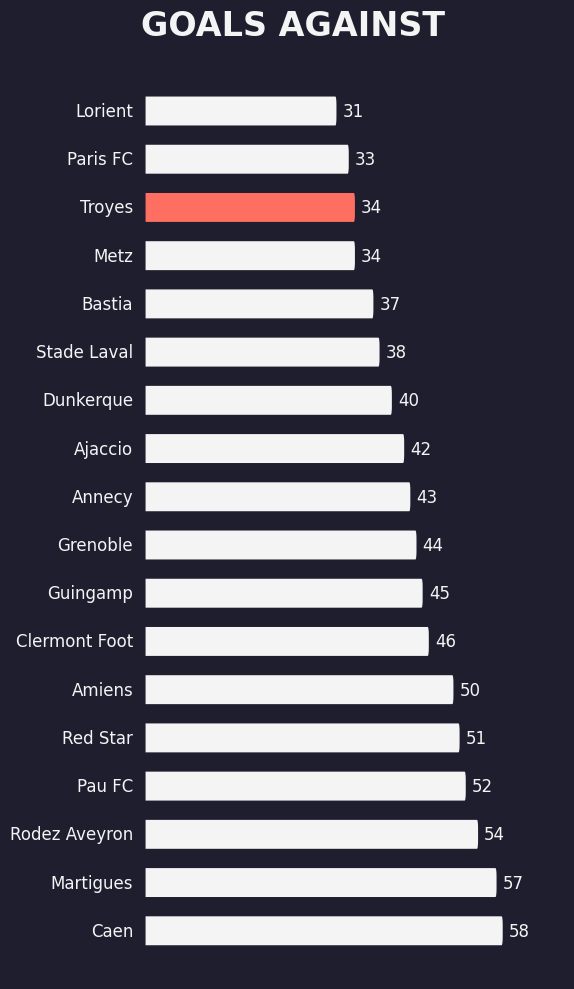

In [23]:
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch
from matplotlib.path import Path
import numpy as np

def create_rounded_bar_right(x, y, width, height, radius=0.8):
    """Crée une barre avec coins arrondis uniquement à droite"""
    # Points de contrôle pour le chemin
    left = x
    right = x + width
    bottom = y - height/2
    top = y + height/2
    
    # Rayon d'arrondi proportionnel à la hauteur
    r = min(radius * height, width/2, height/2)
    
    # Définir les points du chemin
    verts = [
        (left, bottom),                    # Coin bas gauche
        (left, top),                       # Coin haut gauche
        (right - r, top),                  # Début arrondi haut
        (right, top),                      # Point de contrôle
        (right, top - r),                  # Fin arrondi haut
        (right, bottom + r),               # Début arrondi bas
        (right, bottom),                   # Point de contrôle
        (right - r, bottom),               # Fin arrondi bas
        (left, bottom),                    # Retour au début
    ]
    
    # Codes pour le chemin (lignes et courbes)
    codes = [
        Path.MOVETO,
        Path.LINETO,
        Path.LINETO,
        Path.CURVE3,
        Path.CURVE3,
        Path.LINETO,
        Path.CURVE3,
        Path.CURVE3,
        Path.CLOSEPOLY,
    ]
    
    return Path(verts, codes)

# Tri personnalisé
df['_is_troyes'] = (df[('team', '')] == 'Troyes').astype(int)
df_sorted = df.sort_values(
    by=[('Performance', 'GA'), '_is_troyes'], 
    ascending=[True, False]
).drop('_is_troyes', axis=1)

df_sorted = df_sorted.set_index(('team', ''))

fig, ax = plt.subplots(figsize=(6, 10), facecolor=bg_color)
ax.set_facecolor(bg_color)
ax.axis('off')

bar_height = 0.6
bar_color_default = primary_color
bar_color_highlight = secondary_color

n_teams = len(df_sorted)
for i, (team, row) in enumerate(df_sorted.iterrows()):
    y_position = n_teams - 1 - i
    value = row[('Performance', 'GA')]
    color = bar_color_highlight if team == 'Troyes' else bar_color_default
    
    # Créer le chemin pour la barre arrondie
    path = create_rounded_bar_right(0, y_position, value, bar_height, radius=0.3)
    patch = PathPatch(path, facecolor=color, edgecolor='none')
    ax.add_patch(patch)
    
    ax.text(-2, y_position, team, va='center', ha='right', color=primary_color, fontsize=12)
    ax.text(value + 1, y_position, f"{value}", va='center', color=primary_color, fontsize=12)

plt.title("GOALS AGAINST", fontsize=24, fontweight='bold', color=primary_color, pad=20)
ax.set_ylim(-1, n_teams)
ax.set_xlim(-20, df_sorted[('Performance', 'GA')].max() + 10)

plt.tight_layout()
plt.show()

/var/folders/9t/gj8322fj7lj_y88f2hy2t45r0000gn/T/ipykernel_6675/3238548678.py:47: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_sorted = df.sort_values(


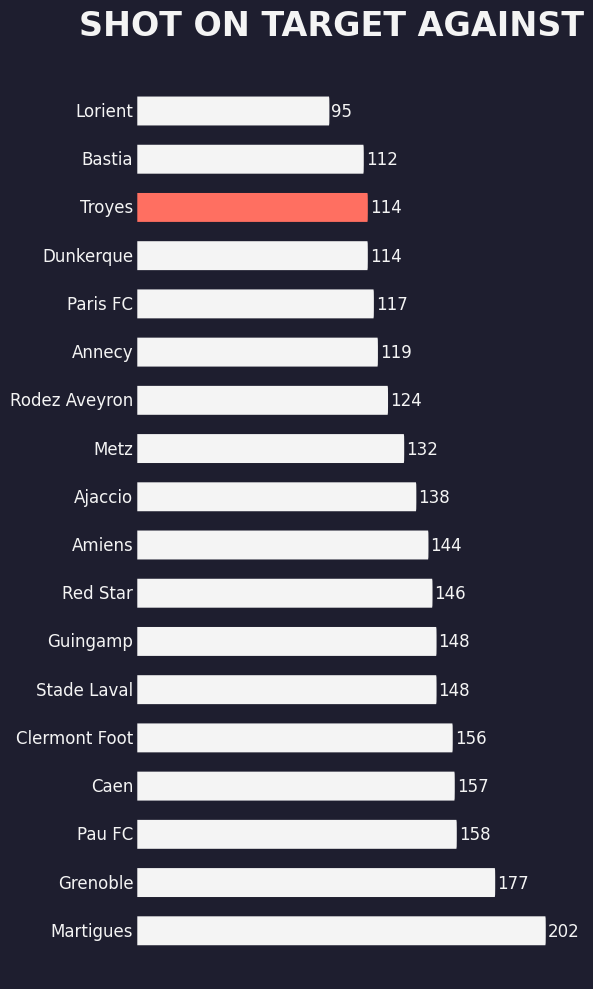

In [7]:
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch
from matplotlib.path import Path
import numpy as np

def create_rounded_bar_right(x, y, width, height, radius=0.8):
    """Crée une barre avec coins arrondis uniquement à droite"""
    # Points de contrôle pour le chemin
    left = x
    right = x + width
    bottom = y - height/2
    top = y + height/2
    
    # Rayon d'arrondi proportionnel à la hauteur
    r = min(radius * height, width/2, height/2)
    
    # Définir les points du chemin
    verts = [
        (left, bottom),                    # Coin bas gauche
        (left, top),                       # Coin haut gauche
        (right - r, top),                  # Début arrondi haut
        (right, top),                      # Point de contrôle
        (right, top - r),                  # Fin arrondi haut
        (right, bottom + r),               # Début arrondi bas
        (right, bottom),                   # Point de contrôle
        (right - r, bottom),               # Fin arrondi bas
        (left, bottom),                    # Retour au début
    ]
    
    # Codes pour le chemin (lignes et courbes)
    codes = [
        Path.MOVETO,
        Path.LINETO,
        Path.LINETO,
        Path.CURVE3,
        Path.CURVE3,
        Path.LINETO,
        Path.CURVE3,
        Path.CURVE3,
        Path.CLOSEPOLY,
    ]
    
    return Path(verts, codes)

# Tri personnalisé
df['_is_troyes'] = (df[('team', '')] == 'Troyes').astype(int)
df_sorted = df.sort_values(
    by=[('Performance', 'SoTA'), '_is_troyes'], 
    ascending=[True, False]
).drop('_is_troyes', axis=1)

df_sorted = df_sorted.set_index(('team', ''))

fig, ax = plt.subplots(figsize=(6, 10), facecolor=bg_color)
ax.set_facecolor(bg_color)
ax.axis('off')

bar_height = 0.6
bar_color_default = primary_color
bar_color_highlight = secondary_color

n_teams = len(df_sorted)
for i, (team, row) in enumerate(df_sorted.iterrows()):
    y_position = n_teams - 1 - i
    value = row[('Performance', 'SoTA')]
    color = bar_color_highlight if team == 'Troyes' else bar_color_default
    
    # Créer le chemin pour la barre arrondie
    path = create_rounded_bar_right(0, y_position, value, bar_height, radius=0.3)
    patch = PathPatch(path, facecolor=color, edgecolor='none')
    ax.add_patch(patch)
    
    ax.text(-2, y_position, team, va='center', ha='right', color=primary_color, fontsize=12)
    ax.text(value + 1, y_position, f"{value}", va='center', color=primary_color, fontsize=12)

plt.title("SHOT ON TARGET AGAINST", fontsize=24, fontweight='bold', color=primary_color, pad=20)
ax.set_ylim(-1, n_teams)
ax.set_xlim(-20, df_sorted[('Performance', 'SoTA')].max() + 10)

plt.tight_layout()
plt.show()

In [8]:
df = fbref.read_team_season_stats(stat_type='shooting', opponent_stats=True)
df = df.reset_index()

In [28]:
df

league season              team players_used 90s Standard            \
                                                               Gls   Sh  SoT   
0   FRA-Ligue-2   2425        vs Ajaccio           31  34       42  437  148   
1   FRA-Ligue-2   2425         vs Amiens           35  34       50  489  153   
2   FRA-Ligue-2   2425         vs Annecy           30  34       41  389  121   
3   FRA-Ligue-2   2425         vs Bastia           26  34       36  321  117   
4   FRA-Ligue-2   2425           vs Caen           34  34       58  436  162   
5   FRA-Ligue-2   2425  vs Clermont Foot           34  34       45  433  165   
6   FRA-Ligue-2   2425      vs Dunkerque           29  34       39  312  115   
7   FRA-Ligue-2   2425       vs Grenoble           32  34       43  477  180   
8   FRA-Ligue-2   2425       vs Guingamp           26  34       44  397  156   
9   FRA-Ligue-2   2425        vs Lorient           26  34       31  274   99   
10  FRA-Ligue-2   2425      vs Martigues           28  34       56  544  214   
11  FRA-Ligue-2   2425           vs Metz           28  34       33  390  135   
12  FRA-Ligue-2   2425       vs Paris FC           27  34       31  355  121   
13  FRA-Ligue-2   2425         vs Pau FC           29  34       52  415  172   
14  FRA-Ligue-2   2425       vs Red Star           25  34       51  427  155   
15  FRA-Ligue-2   2425  vs Rodez Aveyron           29  34       52  394  139   
16  FRA-Ligue-2   2425    vs Stade Laval           29  34       36  428  149   
17  FRA-Ligue-2   2425         vs Troyes           30  34       34  376  121   

                                                   \
    SoT%  Sh/90 SoT/90  G/Sh G/SoT  Dist PK PKatt   
0   33.9  12.85   4.35  0.08  0.24  <NA>  7     7   
1   31.3  14.38    4.5  0.09  0.29  <NA>  5     6   
2   31.1  11.44   3.56   0.1  0.32  <NA>  2     3   
3   36.4   9.44   3.44   0.1  0.26  <NA>  5     5   
4   37.2  12.82   4.76  0.12  0.33  <NA>  5     5   
5   38.1  12.74   4.85  0.09  0.24  <NA>  6     7   
6   36.9   9.18   3.38  0.12  0.32  <NA>  2     4   
7   37.7  14.03   5.29  0.09  0.23  <NA>  2     2   
8   39.3  11.68   4.59   0.1  0.24  <NA>  6     6   
9   36.1   8.06   2.91  0.11   0.3  <NA>  1     1   
10  39.3   16.0   6.29  0.09  0.23  <NA>  6     8   
11  34.6  11.47   3.97  0.08  0.23  <NA>  2     4   
12  34.1  10.44   3.56  0.08  0.23  <NA>  3     3   
13  41.4  12.21   5.06  0.12  0.28  <NA>  3     7   
14  36.3  12.56   4.56  0.11  0.29  <NA>  6     6   
15  35.3  11.59   4.09  0.11  0.32  <NA>  7     9   
16  34.8  12.59   4.38  0.08  0.23  <NA>  2     4   
17  32.2  11.06   3.56  0.08  0.25  <NA>  4     7   

                                        url  
                                             
0         /en/squads/7a54bb4f/Ajaccio-Stats  
1          /en/squads/25622401/Amiens-Stats  
2          /en/squads/c94d9135/Annecy-Stats  
3          /en/squads/6283be2c/Bastia-Stats  
4            /en/squads/74229020/Caen-Stats  
5   /en/squads/d9676424/Clermont-Foot-Stats  
6       /en/squads/1740a29b/Dunkerque-Stats  
7   /en/squads/40aa7280/Grenoble-Foot-Stats  
8        /en/squads/d41b5f53/Guingamp-Stats  
9         /en/squads/d2c87802/Lorient-Stats  
10      /en/squads/82e8a66d/Martigues-Stats  
11           /en/squads/f83960ae/Metz-Stats  
12       /en/squads/056a5a75/Paris-FC-Stats  
13         /en/squads/e5b6b0c1/Pau-FC-Stats  
14       /en/squads/e83d13db/Red-Star-Stats  
15  /en/squads/9130bd3b/Rodez-Aveyron-Stats  
16    /en/squads/66cc304a/Stade-Laval-Stats  
17         /en/squads/54195385/Troyes-Stats

/var/folders/9t/gj8322fj7lj_y88f2hy2t45r0000gn/T/ipykernel_6675/1111592338.py:47: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_sorted = df.sort_values(


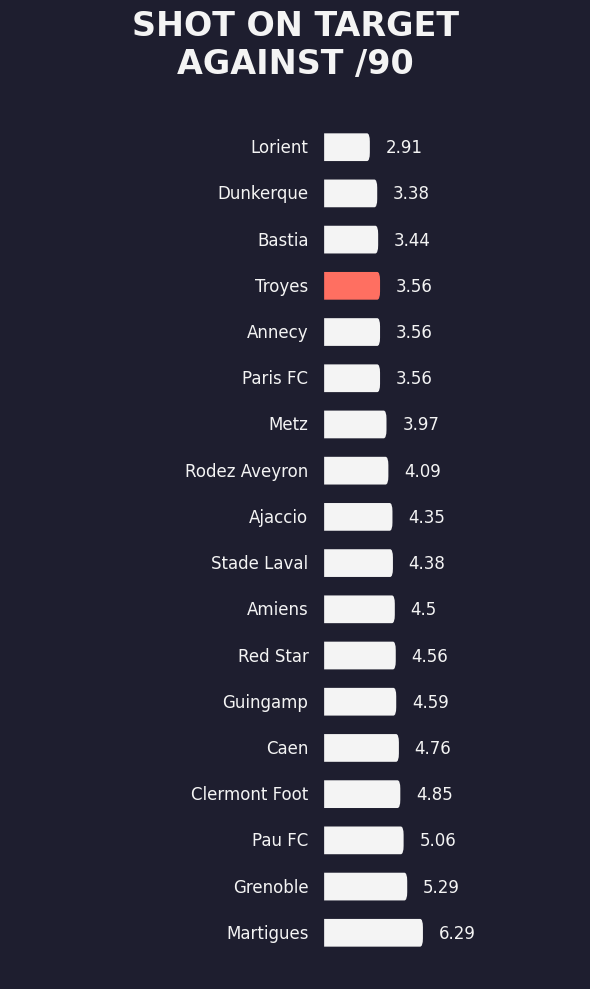

In [10]:
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch
from matplotlib.path import Path
import numpy as np

def create_rounded_bar_right(x, y, width, height, radius=0.8):
    """Crée une barre avec coins arrondis uniquement à droite"""
    # Points de contrôle pour le chemin
    left = x
    right = x + width
    bottom = y - height/2
    top = y + height/2
    
    # Rayon d'arrondi proportionnel à la hauteur
    r = min(radius * height, width/2, height/2)
    
    # Définir les points du chemin
    verts = [
        (left, bottom),                    # Coin bas gauche
        (left, top),                       # Coin haut gauche
        (right - r, top),                  # Début arrondi haut
        (right, top),                      # Point de contrôle
        (right, top - r),                  # Fin arrondi haut
        (right, bottom + r),               # Début arrondi bas
        (right, bottom),                   # Point de contrôle
        (right - r, bottom),               # Fin arrondi bas
        (left, bottom),                    # Retour au début
    ]
    
    # Codes pour le chemin (lignes et courbes)
    codes = [
        Path.MOVETO,
        Path.LINETO,
        Path.LINETO,
        Path.CURVE3,
        Path.CURVE3,
        Path.LINETO,
        Path.CURVE3,
        Path.CURVE3,
        Path.CLOSEPOLY,
    ]
    
    return Path(verts, codes)

# Tri personnalisé
df['_is_troyes'] = (df[('team', '')] == 'vs Troyes').astype(int)
df_sorted = df.sort_values(
    by=[('Standard', 'SoT/90'), '_is_troyes'], 
    ascending=[True, False]
).drop('_is_troyes', axis=1)

df_sorted = df_sorted.set_index(('team', ''))

fig, ax = plt.subplots(figsize=(6, 10), facecolor=bg_color)
ax.set_facecolor(bg_color)
ax.axis('off')

bar_height = 0.6
bar_color_default = primary_color
bar_color_highlight = secondary_color

n_teams = len(df_sorted)
for i, (team, row) in enumerate(df_sorted.iterrows()):
    y_position = n_teams - 1 - i
    value = row[('Standard', 'SoT/90')]
    color = bar_color_highlight if team == 'vs Troyes' else bar_color_default
    
    # Créer le chemin pour la barre arrondie
    path = create_rounded_bar_right(0, y_position, value, bar_height, radius=0.3)
    patch = PathPatch(path, facecolor=color, edgecolor='none')
    ax.add_patch(patch)
    
    ax.text(-1, y_position, team.replace("vs ", ""), va='center', ha='right', color=primary_color, fontsize=12)
    ax.text(value + 1, y_position, f"{value}", va='center', color=primary_color, fontsize=12)

plt.title("SHOT ON TARGET\nAGAINST /90", fontsize=24, fontweight='bold', color=primary_color, pad=20)
ax.set_ylim(-1, n_teams)
ax.set_xlim(-20, df_sorted[('Standard', 'SoT/90')].max() + 10)

plt.tight_layout()
plt.show()

In [37]:
df = fbref.read_team_season_stats(stat_type='misc', opponent_stats=False)
df = df.reset_index()

In [38]:
df

league season           team players_used 90s Performance             \
                                                              CrdY CrdR 2CrdY   
0   FRA-Ligue-2   2425        Ajaccio           31  34          79    8     2   
1   FRA-Ligue-2   2425         Amiens           35  34          67    3     2   
2   FRA-Ligue-2   2425         Annecy           30  34          80    6     1   
3   FRA-Ligue-2   2425         Bastia           26  34          77    6     2   
4   FRA-Ligue-2   2425           Caen           34  34          69    5     0   
5   FRA-Ligue-2   2425  Clermont Foot           34  34          70    6     3   
6   FRA-Ligue-2   2425      Dunkerque           29  34          64    3     1   
7   FRA-Ligue-2   2425       Grenoble           32  34          50    3     1   
8   FRA-Ligue-2   2425       Guingamp           26  34          40    2     0   
9   FRA-Ligue-2   2425        Lorient           26  34          48    1     0   
10  FRA-Ligue-2   2425      Martigues           28  34          59    7     2   
11  FRA-Ligue-2   2425           Metz           28  34          55    1     0   
12  FRA-Ligue-2   2425       Paris FC           27  34          70    4     3   
13  FRA-Ligue-2   2425         Pau FC           29  34          76    5     2   
14  FRA-Ligue-2   2425       Red Star           25  34          58    1     0   
15  FRA-Ligue-2   2425  Rodez Aveyron           29  34          64    3     1   
16  FRA-Ligue-2   2425    Stade Laval           29  34          64    2     1   
17  FRA-Ligue-2   2425         Troyes           30  34          54    4     2   

                                                \
    Fls  Fld Off  Crs  Int TklW PKwon PKcon OG   
0   463  459  86  537  308  351  <NA>  <NA>  0   
1   387  483  63  552  303  416  <NA>  <NA>  0   
2   521  373  42  446  351  362  <NA>  <NA>  2   
3   453  496  69  618  334  403  <NA>  <NA>  1   
4   454  430  65  749  292  352  <NA>  <NA>  0   
5   406  414  68  645  268  328  <NA>  <NA>  1   
6   443  402  59  600  273  319  <NA>  <NA>  1   
7   426  369  91  480  324  402  <NA>  <NA>  1   
8   434  460  81  658  321  377  <NA>  <NA>  1   
9   443  404  79  729  325  426  <NA>  <NA>  0   
10  420  408  42  578  346  366  <NA>  <NA>  0   
11  384  437  63  633  330  350  <NA>  <NA>  1   
12  430  417  72  567  290  425  <NA>  <NA>  2   
13  462  391  66  720  280  333  <NA>  <NA>  1   
14  429  379  45  592  360  344  <NA>  <NA>  0   
15  454  329  68  793  365  403  <NA>  <NA>  2   
16  484  396  54  648  337  372  <NA>  <NA>  2   
17  405  412  57  564  329  286  <NA>  <NA>  0   

                                        url  
                                             
0         /en/squads/7a54bb4f/Ajaccio-Stats  
1          /en/squads/25622401/Amiens-Stats  
2          /en/squads/c94d9135/Annecy-Stats  
3          /en/squads/6283be2c/Bastia-Stats  
4            /en/squads/74229020/Caen-Stats  
5   /en/squads/d9676424/Clermont-Foot-Stats  
6       /en/squads/1740a29b/Dunkerque-Stats  
7   /en/squads/40aa7280/Grenoble-Foot-Stats  
8        /en/squads/d41b5f53/Guingamp-Stats  
9         /en/squads/d2c87802/Lorient-Stats  
10      /en/squads/82e8a66d/Martigues-Stats  
11           /en/squads/f83960ae/Metz-Stats  
12       /en/squads/056a5a75/Paris-FC-Stats  
13         /en/squads/e5b6b0c1/Pau-FC-Stats  
14       /en/squads/e83d13db/Red-Star-Stats  
15  /en/squads/9130bd3b/Rodez-Aveyron-Stats  
16    /en/squads/66cc304a/Stade-Laval-Stats  
17         /en/squads/54195385/Troyes-Stats

/var/folders/9t/gj8322fj7lj_y88f2hy2t45r0000gn/T/ipykernel_32319/2336764947.py:47: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df_sorted = df.sort_values(


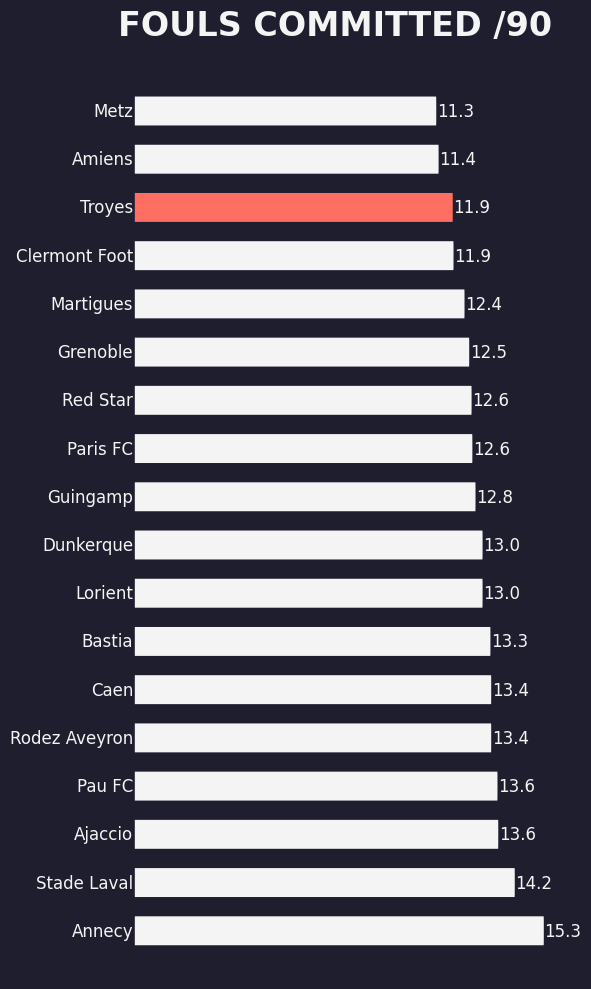

In [47]:
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch
from matplotlib.path import Path
import numpy as np

def create_rounded_bar_right(x, y, width, height, radius=0.8):
    """Crée une barre avec coins arrondis uniquement à droite"""
    # Points de contrôle pour le chemin
    left = x
    right = x + width
    bottom = y - height/2
    top = y + height/2
    
    # Rayon d'arrondi proportionnel à la hauteur
    r = min(radius * height, width/2, height/2)
    
    # Définir les points du chemin
    verts = [
        (left, bottom),                    # Coin bas gauche
        (left, top),                       # Coin haut gauche
        (right - r, top),                  # Début arrondi haut
        (right, top),                      # Point de contrôle
        (right, top - r),                  # Fin arrondi haut
        (right, bottom + r),               # Début arrondi bas
        (right, bottom),                   # Point de contrôle
        (right - r, bottom),               # Fin arrondi bas
        (left, bottom),                    # Retour au début
    ]
    
    # Codes pour le chemin (lignes et courbes)
    codes = [
        Path.MOVETO,
        Path.LINETO,
        Path.LINETO,
        Path.CURVE3,
        Path.CURVE3,
        Path.LINETO,
        Path.CURVE3,
        Path.CURVE3,
        Path.CLOSEPOLY,
    ]
    
    return Path(verts, codes)

# Tri personnalisé
df['_is_troyes'] = (df[('team', '')] == 'Troyes').astype(int)
df_sorted = df.sort_values(
    by=[('Performance', 'Fls'), '_is_troyes'], 
    ascending=[True, False]
).drop('_is_troyes', axis=1)

df_sorted = df_sorted.set_index(('team', ''))

fig, ax = plt.subplots(figsize=(6, 10), facecolor=bg_color)
ax.set_facecolor(bg_color)
ax.axis('off')

bar_height = 0.6
bar_color_default = primary_color
bar_color_highlight = secondary_color

n_teams = len(df_sorted)
for i, (team, row) in enumerate(df_sorted.iterrows()):
    y_position = n_teams - 1 - i
    value = row[('Performance', 'Fls')]
    color = bar_color_highlight if team == 'Troyes' else bar_color_default
    
    # Créer le chemin pour la barre arrondie
    path = create_rounded_bar_right(0, y_position, value, bar_height, radius=0.3)
    patch = PathPatch(path, facecolor=color, edgecolor='none')
    ax.add_patch(patch)
    
    ax.text(-2, y_position, team, va='center', ha='right', color=primary_color, fontsize=12)
    ax.text(value + 1, y_position, f"{round(value/34, 1)}", va='center', color=primary_color, fontsize=12)

plt.title("FOULS COMMITTED /90", fontsize=24, fontweight='bold', color=primary_color, pad=20)
ax.set_ylim(-1, n_teams)
ax.set_xlim(-20, df_sorted[('Performance', 'Fls')].max() + 10)

plt.tight_layout()
plt.show()

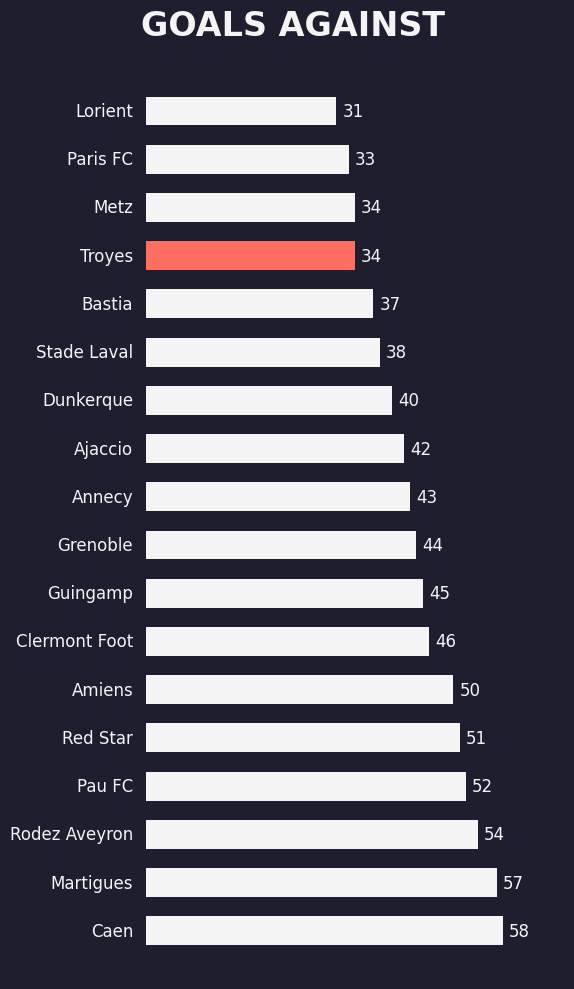

In [17]:
import matplotlib.pyplot as plt

df_sorted = df.sort_values(by=('Performance', 'GA'), ascending=False).set_index(('team', ''))

fig, ax = plt.subplots(figsize=(6, 10), facecolor=bg_color)
ax.set_facecolor(bg_color)
ax.axis('off')

bar_height = 0.6
bar_color_default = primary_color
bar_color_highlight = secondary_color  # Optionnel

for i, (team, row) in enumerate(df_sorted.iterrows()):
    value = row[('Performance', 'GA')]
    color = bar_color_highlight if team == 'Troyes' else bar_color_default

    ax.barh(i, value, height=bar_height, color=color, edgecolor='none')

    ax.text(-2, i, team, va='center', ha='right', color=primary_color, fontsize=12)
    ax.text(value + 1, i, f"{value}", va='center', color=primary_color, fontsize=12)

plt.title("GOALS AGAINST", fontsize=24, fontweight='bold', color=primary_color, pad=20)
ax.set_ylim(-1, len(df_sorted))
ax.set_xlim(-20, df_sorted[('Performance', 'GA')].max() + 10)

# ax.invert_yaxis()  # <-- inverser l’axe y ici

plt.tight_layout()
plt.show()


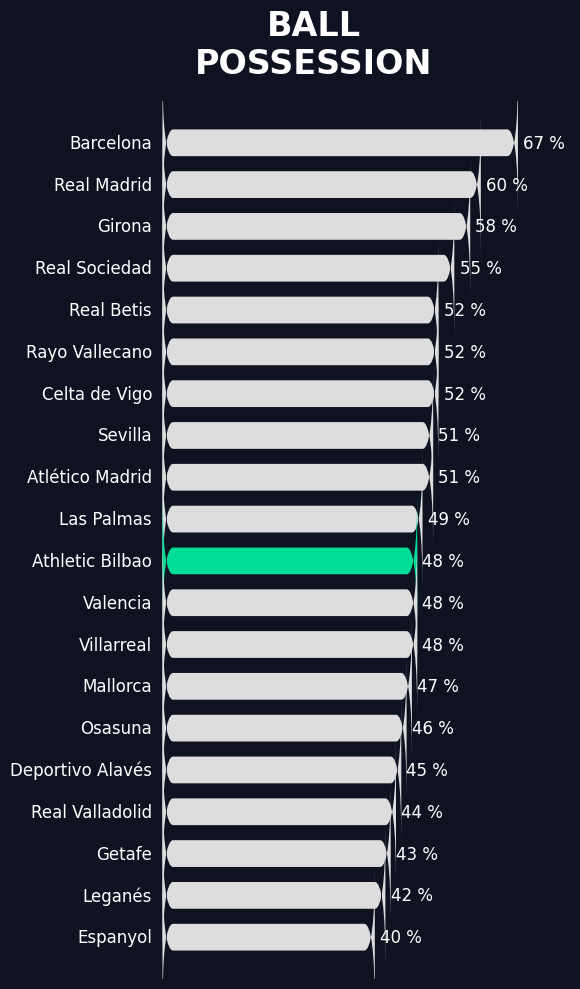

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch

# Données
data = {
    'Team': [
        'Barcelona', 'Real Madrid', 'Girona', 'Real Sociedad', 'Real Betis',
        'Rayo Vallecano', 'Celta de Vigo', 'Sevilla', 'Atlético Madrid',
        'Las Palmas', 'Valencia', 'Villarreal', 'Athletic Bilbao',
        'Mallorca', 'Osasuna', 'Deportivo Alavés', 'Real Valladolid',
        'Getafe', 'Leganés', 'Espanyol'
    ],
    'Possession': [
        67, 60, 58, 55, 52, 52, 52, 51, 51, 49, 48, 48, 48,
        47, 46, 45, 44, 43, 42, 40
    ]
}

df = pd.DataFrame(data)
df = df.sort_values(by='Possession', ascending=False).reset_index(drop=True)

# Setup plot
fig, ax = plt.subplots(figsize=(6, 10), facecolor='#0e1221')
ax.set_facecolor('#0e1221')
ax.axis('off')

# Paramètres
bar_height = 0.6
bar_color_default = '#dddddd'
bar_color_highlight = '#00dd96'

# Dessin manuel des barres (avec coins très légèrement arrondis)
for i, row in df.iterrows():
    team = row['Team']
    value = row['Possession']
    color = bar_color_highlight if team == 'Athletic Bilbao' else bar_color_default

    # Barres arrondies plus discrètement (rectangle à coins doux)
    bar = FancyBboxPatch(
        (0, i - bar_height / 2), value, bar_height,
        boxstyle="round,pad=0.02,rounding_size=2",
        linewidth=0, facecolor=color
    )
    ax.add_patch(bar)

    # Texte à gauche
    ax.text(-2, i, team, va='center', ha='right', color='white', fontsize=12)

    # Texte à droite
    ax.text(value + 1, i, f"{value} %", va='center', color='white', fontsize=12)

# Titre
plt.title("BALL\nPOSSESSION", fontsize=24, fontweight='bold', color='white', pad=20)

# Inverser pour afficher de haut en bas (1er en haut)
ax.set_ylim(len(df), -1)

# Limites x
ax.set_xlim(-20, df['Possession'].max() + 10)

plt.tight_layout()
plt.show()


In [52]:
# for type_stat in all_types:
df_players = fbref.read_player_season_stats(stat_type="standard")
df_players = df_players.reset_index()

In [53]:
df_players = df_players[df_players["team"] == "Troyes"] 

In [55]:
df = df_players
print(df.columns)
df

MultiIndex([(        'league',       ''),
            (        'season',       ''),
            (          'team',       ''),
            (        'player',       ''),
            (        'nation',       ''),
            (           'pos',       ''),
            (           'age',       ''),
            (          'born',       ''),
            (  'Playing Time',     'MP'),
            (  'Playing Time', 'Starts'),
            (  'Playing Time',    'Min'),
            (  'Playing Time',    '90s'),
            (   'Performance',    'Gls'),
            (   'Performance',    'Ast'),
            (   'Performance',    'G+A'),
            (   'Performance',   'G-PK'),
            (   'Performance',     'PK'),
            (   'Performance',  'PKatt'),
            (   'Performance',   'CrdY'),
            (   'Performance',   'CrdR'),
            ('Per 90 Minutes',    'Gls'),
            ('Per 90 Minutes',    'Ast'),
            ('Per 90 Minutes',    'G+A'),
            ('Per 90 Minutes',   '

league season    team                player nation    pos age  born  \
                                                                                
498  FRA-Ligue-2   2425  Troyes       Abdoulaye Kanté    FRA     MF  19  2005   
499  FRA-Ligue-2   2425  Troyes        Adrien Monfray    FRA     DF  33  1990   
500  FRA-Ligue-2   2425  Troyes  Alexandre Phliponeau    FRA     MF  24  2000   
501  FRA-Ligue-2   2425  Troyes         Andreas Bruus    DEN  DF,FW  25  1999   
502  FRA-Ligue-2   2425  Troyes         Cyriaque Irié    BFA  MF,FW  19  2005   
503  FRA-Ligue-2   2425  Troyes     Houboulang Mendes    GNB     DF  26  1998   
504  FRA-Ligue-2   2425  Troyes        Ibrahim Traoré    FRA     MF  18  2006   
505  FRA-Ligue-2   2425  Troyes          Ismaël Boura    COM     DF  23  2000   
506  FRA-Ligue-2   2425  Troyes          Joseph Nonge    BEL     MF  19  2005   
507  FRA-Ligue-2   2425  Troyes           Junior Diaz    CIV     DF  21  2003   
508  FRA-Ligue-2   2425  Troyes      Kouadou Assoumou    FRA  FW,MF  21  2002   
509  FRA-Ligue-2   2425  Troyes          Kyliane Dong    FRA     MF  19  2004   
510  FRA-Ligue-2   2425  Troyes        Martin Adeline    FRA     MF  20  2003   
511  FRA-Ligue-2   2425  Troyes          Mathis Hamdi    FRA     DF  20  2003   
512  FRA-Ligue-2   2425  Troyes      Mathys Detourbet    FRA     MF  17  2007   
513  FRA-Ligue-2   2425  Troyes          Mehdi Tahrat    ALG     DF  34  1990   
514  FRA-Ligue-2   2425  Troyes         Mouhamed Diop    SEN     MF  23  2000   
515  FRA-Ligue-2   2425  Troyes    Mounaim El Idrissy    FRA     FW  25  1999   
516  FRA-Ligue-2   2425  Troyes      Nicolas Lemaître    FRA     GK  27  1997   
517  FRA-Ligue-2   2425  Troyes   Nicolas de Préville    FRA     FW  33  1991   
518  FRA-Ligue-2   2425  Troyes     Paolo Gozzi Iweru    ITA     DF  23  2001   
519  FRA-Ligue-2   2425  Troyes         Pape Ibnou Bâ    MTN     FW  31  1993   
520  FRA-Ligue-2   2425  Troyes           Rafiki Said    COM     MF  24  2000   
521  FRA-Ligue-2   2425  Troyes         Renaud Ripart    FRA  FW,MF  31  1993   
522  FRA-Ligue-2   2425  Troyes             Ryan Fage    FRA     MF  20  2003   
523  FRA-Ligue-2   2425  Troyes         Thierno Balde    FRA     DF  22  2002   
524  FRA-Ligue-2   2425  Troyes          Tom Akpakoun    FRA     DF  19  2005   
525  FRA-Ligue-2   2425  Troyes     Xavier Chavalerin    FRA     MF  33  1991   
526  FRA-Ligue-2   2425  Troyes   Youssouf M'Changama    COM     MF  33  1990   
527  FRA-Ligue-2   2425  Troyes      Zacharie Boucher    FRA     GK  32  1992   

    Playing Time         ... Performance                    Per 90 Minutes  \
              MP Starts  ...        G-PK PK PKatt CrdY CrdR            Gls   
498           29     24  ...           0  0     0    7    1            0.0   
499           26     26  ...           0  0     0    3    0            0.0   
500           10      7  ...           0  0     0    1    0            0.0   
501            2      0  ...           0  0     0    1    0            0.0   
502           33     31  ...           6  0     0    4    0           0.21   
503           29     28  ...           1  0     0    5    0           0.04   
504            5      1  ...           0  0     0    0    0            0.0   
505           31     28  ...           0  0     0    8    1            0.0   
506            6      2  ...           0  0     0    3    0            0.0   
507           34     34  ...           0  0     0    6    0            0.0   
508           24      6  ...           1  0     0    1    0           0.14   
509           17      3  ...           1  0     1    0    0           0.19   
510           23     11  ...           1  0     0    1    0           0.09   
511            4      3  ...           0  0     0    0    1            0.0   
512           12      1  ...           0  0     0    0    0            0.0   
513            4      3  ...           0  0     0    0    0            0.0   
514          

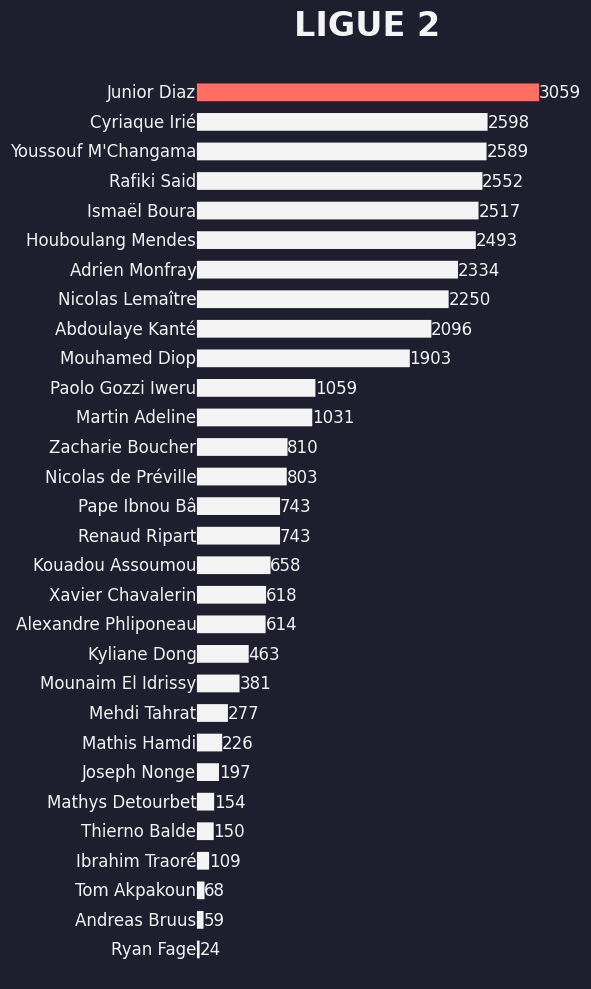

In [63]:
import matplotlib.pyplot as plt
from matplotlib.patches import PathPatch
from matplotlib.path import Path
import numpy as np

def create_rounded_bar_right(x, y, width, height, radius=0.8):
    """Crée une barre avec coins arrondis uniquement à droite"""
    # Points de contrôle pour le chemin
    left = x
    right = x + width
    bottom = y - height/2
    top = y + height/2
    
    # Rayon d'arrondi proportionnel à la hauteur
    r = min(radius * height, width/2, height/2)
    
    # Définir les points du chemin
    verts = [
        (left, bottom),                    # Coin bas gauche
        (left, top),                       # Coin haut gauche
        (right - r, top),                  # Début arrondi haut
        (right, top),                      # Point de contrôle
        (right, top - r),                  # Fin arrondi haut
        (right, bottom + r),               # Début arrondi bas
        (right, bottom),                   # Point de contrôle
        (right - r, bottom),               # Fin arrondi bas
        (left, bottom),                    # Retour au début
    ]
    
    # Codes pour le chemin (lignes et courbes)
    codes = [
        Path.MOVETO,
        Path.LINETO,
        Path.LINETO,
        Path.CURVE3,
        Path.CURVE3,
        Path.LINETO,
        Path.CURVE3,
        Path.CURVE3,
        Path.CLOSEPOLY,
    ]
    
    return Path(verts, codes)

df_sorted = df.sort_values(
    by=[('Playing Time', 'Min')], 
    ascending=[False]
)

df_sorted = df_sorted.set_index(('player', ''))

fig, ax = plt.subplots(figsize=(6, 10), facecolor=bg_color)
ax.set_facecolor(bg_color)
ax.axis('off')

bar_height = 0.6
bar_color_default = primary_color
bar_color_highlight = secondary_color

n_teams = len(df_sorted)
for i, (team, row) in enumerate(df_sorted.iterrows()):
    y_position = n_teams - 1 - i
    value = row[('Playing Time', 'Min')]
    color = bar_color_highlight if team == 'Junior Diaz' else bar_color_default
    
    # Créer le chemin pour la barre arrondie
    path = create_rounded_bar_right(0, y_position, value, bar_height, radius=0.3)
    patch = PathPatch(path, facecolor=color, edgecolor='none')
    ax.add_patch(patch)
    
    ax.text(-5, y_position, team, va='center', ha='right', color=primary_color, fontsize=12)
    ax.text(value - 2, y_position, f"{value}", va='center', color=primary_color, fontsize=12)

plt.title("LIGUE 2", fontsize=24, fontweight='bold', color=primary_color, pad=20)
ax.set_ylim(-1, n_teams)
ax.set_xlim(-20, df_sorted[('Playing Time', 'Min')].max() + 10)

plt.tight_layout()
plt.show()

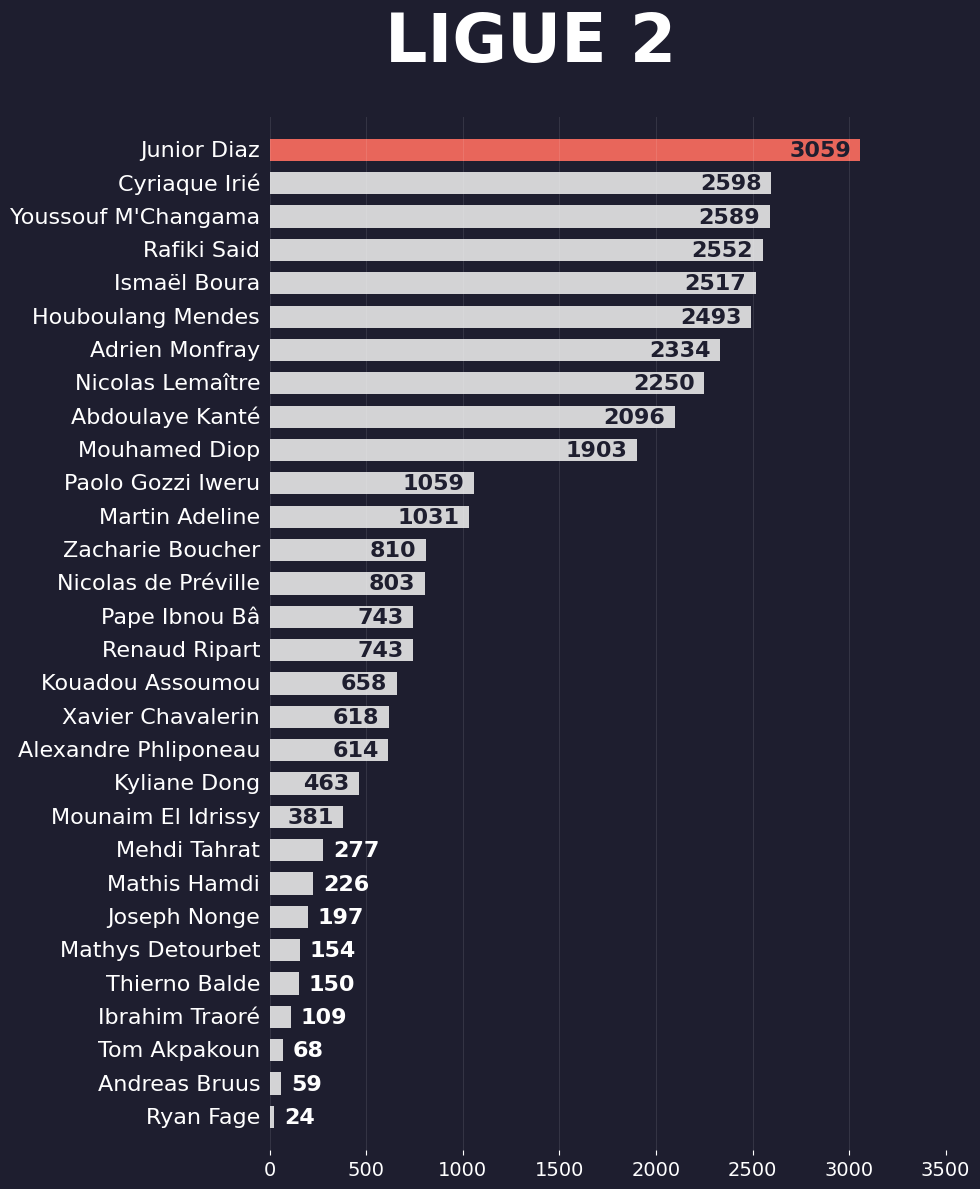

<Figure size 640x480 with 0 Axes>

In [66]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np

# Configuration des couleurs pour correspondre au style La Liga
bg_color = '#1e1e2f'  # Fond sombre bleu-gris
primary_color = '#ffffff'  # Texte blanc
bar_color_default = '#e8e8e8'  # Barres grises claires
bar_color_highlight = '#ff6f61'  # Barre verte pour le joueur highlight

# Tri des données par minutes jouées (décroissant)
df_sorted = df.sort_values(
    by=[('Playing Time', 'Min')],
    ascending=[False]
)
df_sorted = df_sorted.set_index(('player', ''))

# Configuration de la figure
fig, ax = plt.subplots(figsize=(10, 12), facecolor=bg_color)
ax.set_facecolor(bg_color)

# Configuration de la hauteur des barres
bar_height = 0.8
bar_spacing = 1.2  # Espacement entre les barres

# Nombre de joueurs
n_players = len(df_sorted)

# Dessiner les barres
for i, (player, row) in enumerate(df_sorted.iterrows()):
    y_position = (n_players - 1 - i) * bar_spacing
    value = row[('Playing Time', 'Min')]
    
    # Choisir la couleur (mettre en surbrillance si c'est le joueur spécifique)
    color = bar_color_highlight if player == 'Junior Diaz' else bar_color_default
    
    # Créer une barre simple (sans arrondi pour matcher le style La Liga)
    rect = Rectangle((0, y_position - bar_height/2), 
                    value, 
                    bar_height,
                    facecolor=color,
                    edgecolor='none',
                    alpha=0.9)
    ax.add_patch(rect)
    
    # Ajouter le nom du joueur à gauche
    ax.text(-50, y_position, player, 
            va='center', ha='right', 
            color=primary_color, 
            fontsize=16,
            fontweight='normal')
    
    # Ajouter la valeur sur la barre (à droite, à l'intérieur)
    # Position adaptative selon la taille de la barre
    if value > 300:  # Si la barre est assez grande
        ax.text(value - 50, y_position, f"{int(value)}", 
                va='center', ha='right',
                color=bg_color,  # Texte sombre sur barre claire
                fontsize=16,
                fontweight='bold')
    else:  # Si la barre est trop petite, mettre le texte à l'extérieur
        ax.text(value + 50, y_position, f"{int(value)}", 
                va='center', ha='left',
                color=primary_color,
                fontsize=16,
                fontweight='bold')

# Titre
plt.title("LIGUE 2", fontsize=48, fontweight='bold', 
          color=primary_color, pad=40, loc='center')

# Configuration des axes
ax.set_ylim(-bar_spacing, n_players * bar_spacing)
max_value = df_sorted[('Playing Time', 'Min')].max()
ax.set_xlim(-800, max_value + 200)

# Désactiver les axes mais garder la grille
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Ajouter une grille verticale subtile
ax.set_xticks(range(0, int(max_value) + 500, 500))
ax.set_xticklabels([str(x) for x in range(0, int(max_value) + 500, 500)], 
                   color=primary_color, fontsize=14)
ax.tick_params(axis='x', colors=primary_color, which='both', top=False, bottom=True)
ax.xaxis.set_ticks_position('bottom')

# Grille verticale
ax.grid(True, axis='x', linestyle='-', alpha=0.1, color=primary_color)

# Pas de grille ni de ticks sur l'axe Y
ax.set_yticks([])
ax.grid(False, axis='y')

# Position de l'axe X en bas
ax.xaxis.set_label_position('bottom')

plt.tight_layout()
plt.show()
plt.savefig('ligue2_playing_time.png', dpi=300, facecolor=bg_color, 
            edgecolor='none', bbox_inches='tight')

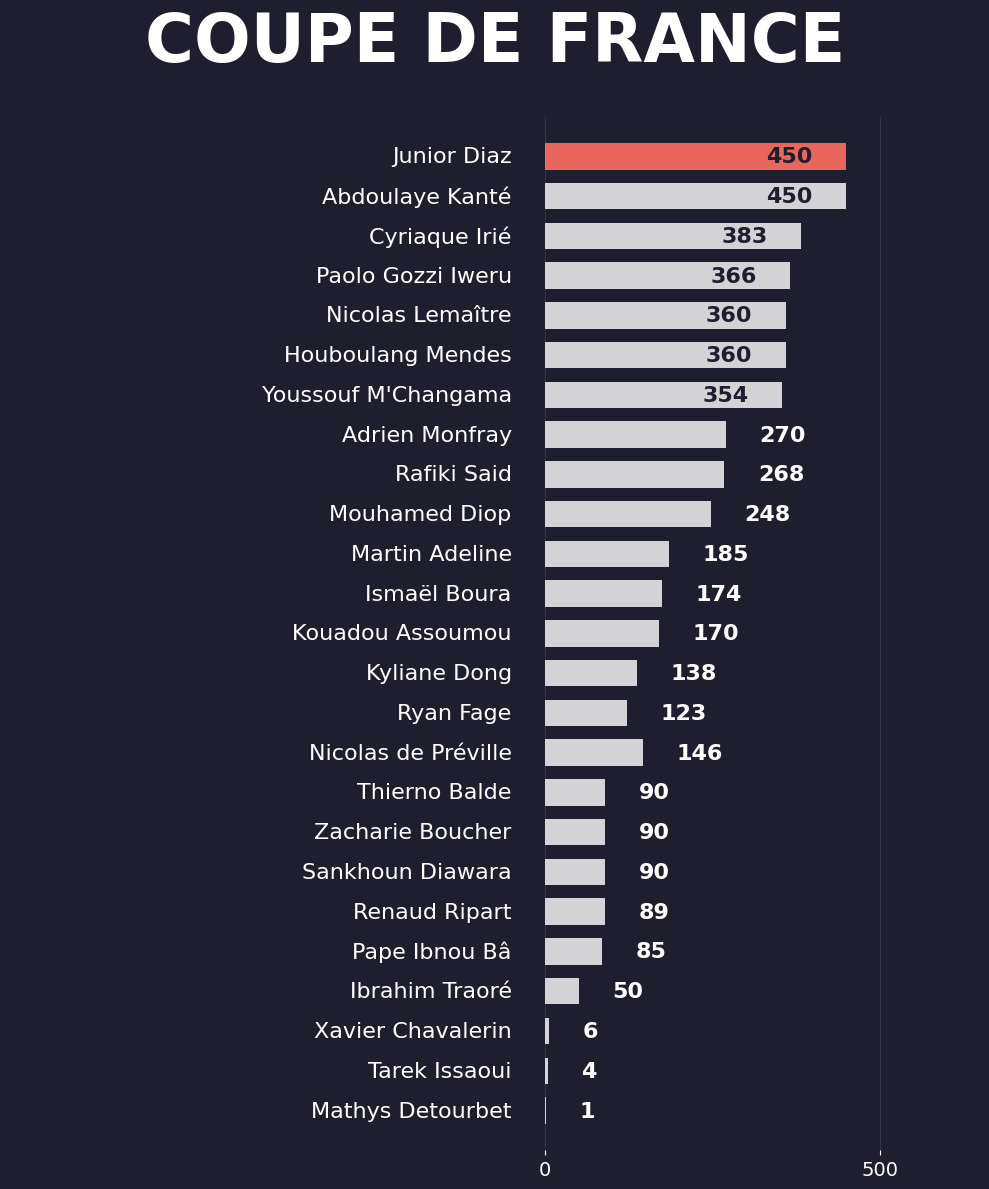

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np

# Création du DataFrame à partir des données
data = {
    'player': [
        'Junior Diaz', 'Abdoulaye Kanté', 'Cyriaque Irié', 'Paolo Gozzi Iweru',
        'Nicolas Lemaître', 'Houboulang Mendes', 'Youssouf M\'Changama', 'Adrien Monfray',
        'Rafiki Said', 'Mouhamed Diop', 'Martin Adeline', 'Ismaël Boura',
        'Kouadou Assoumou', 'Kyliane Dong', 'Ryan Fage', 'Nicolas de Préville',
        'Thierno Balde', 'Zacharie Boucher', 'Sankhoun Diawara', 'Renaud Ripart',
        'Pape Ibnou Bâ', 'Ibrahim Traoré', 'Xavier Chavalerin', 'Tarek Issaoui',
        'Mathys Detourbet'
    ],
    'Min': [
        450, 450, 383, 366, 360, 360, 354, 270, 268, 248, 185, 174,
        170, 138, 123, 146, 90, 90, 90, 89, 85, 50, 6, 4, 1
    ]
}

df = pd.DataFrame(data)

# Configuration des couleurs pour correspondre au style
bg_color = '#1e1e2f'  # Fond sombre bleu-gris
primary_color = '#ffffff'  # Texte blanc
bar_color_default = '#e8e8e8'  # Barres grises claires
bar_color_highlight = '#ff6f61'  # Barre rouge-corail pour le joueur highlight

# Tri des données par minutes jouées (décroissant)
df_sorted = df.sort_values(by='Min', ascending=False)

# Configuration de la figure
fig, ax = plt.subplots(figsize=(10, 12), facecolor=bg_color)
ax.set_facecolor(bg_color)

# Configuration de la hauteur des barres
bar_height = 0.8
bar_spacing = 1.2  # Espacement entre les barres

# Nombre de joueurs
n_players = len(df_sorted)

# Dessiner les barres
for i, row in df_sorted.iterrows():
    player = row['player']
    value = row['Min']
    y_position = (n_players - 1 - i) * bar_spacing
    
    # Choisir la couleur (mettre en surbrillance si c'est le joueur spécifique)
    color = bar_color_highlight if player == 'Junior Diaz' else bar_color_default
    
    # Créer une barre simple
    rect = Rectangle((0, y_position - bar_height/2),
                    value,
                    bar_height,
                    facecolor=color,
                    edgecolor='none',
                    alpha=0.9)
    ax.add_patch(rect)
    
    # Ajouter le nom du joueur à gauche
    ax.text(-50, y_position, player,
            va='center', ha='right',
            color=primary_color,
            fontsize=16,
            fontweight='normal')
    
    # Ajouter la valeur sur la barre (à droite, à l'intérieur)
    # Position adaptative selon la taille de la barre
    if value > 300:  # Si la barre est assez grande
        ax.text(value - 50, y_position, f"{int(value)}",
                va='center', ha='right',
                color=bg_color,  # Texte sombre sur barre claire
                fontsize=16,
                fontweight='bold')
    else:  # Si la barre est trop petite, mettre le texte à l'extérieur
        ax.text(value + 50, y_position, f"{int(value)}",
                va='center', ha='left',
                color=primary_color,
                fontsize=16,
                fontweight='bold')

# Titre
plt.title("COUPE DE FRANCE", fontsize=48, fontweight='bold',
          color=primary_color, pad=40, loc='center')

# Configuration des axes
ax.set_ylim(-bar_spacing, n_players * bar_spacing)
max_value = df_sorted['Min'].max()
ax.set_xlim(-800, max_value + 200)

# Désactiver les axes mais garder la grille
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Ajouter une grille verticale subtile
ax.set_xticks(range(0, int(max_value) + 500, 500))
ax.set_xticklabels([str(x) for x in range(0, int(max_value) + 500, 500)],
                   color=primary_color, fontsize=14)
ax.tick_params(axis='x', colors=primary_color, which='both', top=False, bottom=True)
ax.xaxis.set_ticks_position('bottom')

# Grille verticale
ax.grid(True, axis='x', linestyle='-', alpha=0.1, color=primary_color)

# Pas de grille ni de ticks sur l'axe Y
ax.set_yticks([])
ax.grid(False, axis='y')

# Position de l'axe X en bas
ax.xaxis.set_label_position('bottom')

plt.tight_layout()
plt.show()

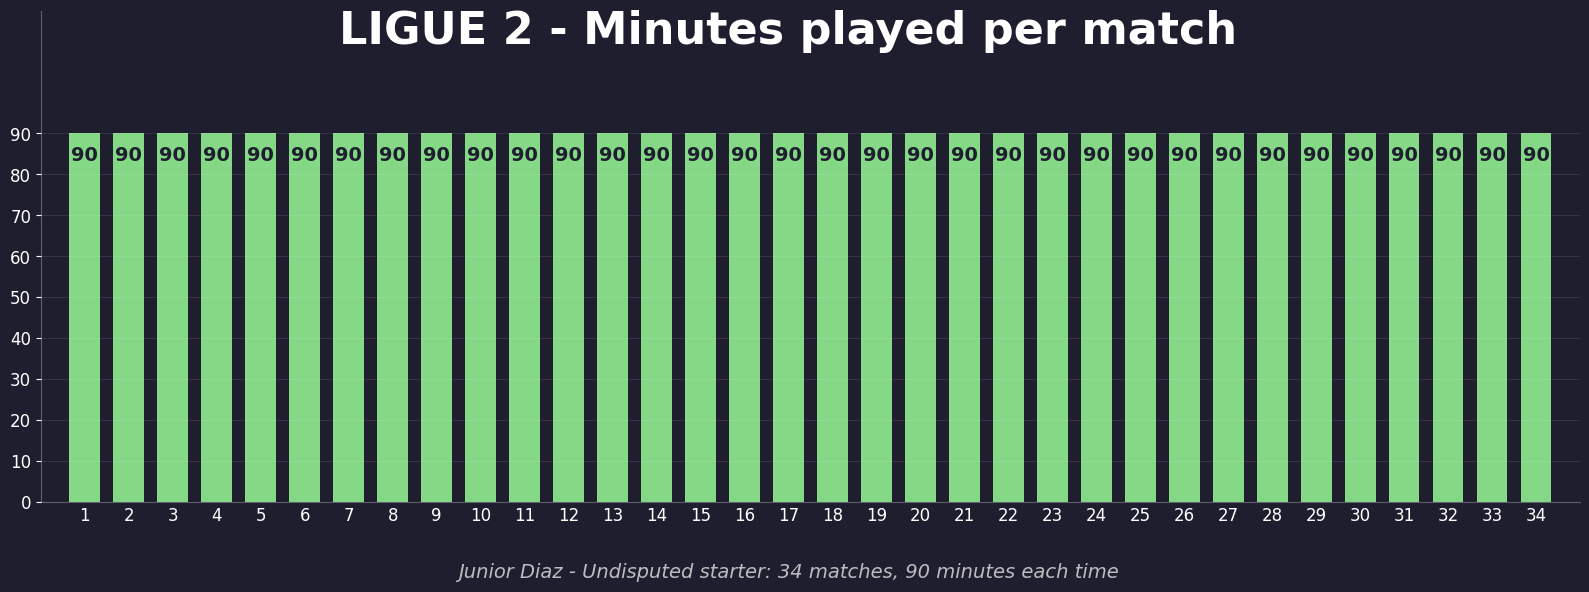

In [72]:
import matplotlib.pyplot as plt
import numpy as np

# Configuration des couleurs
bg_color = '#1e1e2f'  # Fond sombre bleu-gris
primary_color = '#ffffff'  # Texte blanc
bar_color = '#90ee90'  # Vert clair pour les barres
highlight_color = '#ff6f61'  # Rouge-corail pour les highlights

# Données - Junior Diaz a joué 90 minutes à chaque match
match_days = range(1, 35)  # 34 journées de Ligue 2
minutes = [90] * 34  # 90 minutes à chaque match

# Configuration de la figure
fig, ax = plt.subplots(figsize=(16, 6), facecolor=bg_color)
ax.set_facecolor(bg_color)

# Largeur des barres
bar_width = 0.7

# Création des barres
bars = ax.bar(match_days, minutes, width=bar_width, color=bar_color, 
               edgecolor='none', alpha=0.9)

# Ajouter les valeurs à l'intérieur de chaque barre, tout en haut
for i, (day, min_played) in enumerate(zip(match_days, minutes)):
    ax.text(day, min_played - 3, str(min_played), 
            ha='center', va='top', color=bg_color, 
            fontsize=14, fontweight='bold')

# Titre
ax.text(17, 115, "LIGUE 2 - Minutes played per match", 
        ha='center', va='center', color=primary_color, 
        fontsize=32, fontweight='bold')

# Configuration des axes
ax.set_xlim(0, 35)
ax.set_ylim(0, 120)

# Axe X - Journées
ax.set_xticks(match_days)
ax.set_xticklabels([str(d) for d in match_days], 
                   color=primary_color, fontsize=12)

# Axe Y - Minutes
ax.set_yticks(range(0, 100, 10))
ax.set_yticklabels([str(y) for y in range(0, 100, 10)], 
                   color=primary_color, fontsize=12)

# Style des axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color(primary_color)
ax.spines['left'].set_alpha(0.3)
ax.spines['bottom'].set_color(primary_color)
ax.spines['bottom'].set_alpha(0.3)

# Grille horizontale subtile
ax.grid(True, axis='y', linestyle='-', alpha=0.1, color=primary_color)
ax.grid(False, axis='x')

# Labels des axes
ax.set_xlabel('', fontsize=14, color=primary_color)
ax.set_ylabel('', fontsize=14, color=primary_color)

# Ajuster les ticks
ax.tick_params(axis='both', colors=primary_color, labelsize=12)
ax.tick_params(axis='x', length=0)  # Supprimer les traits de l'axe X

# Note: Puisque Junior Diaz a joué tous les matchs 90 minutes,
# nous pourrions ajouter une annotation pour le souligner
ax.text(17, -15, "Junior Diaz - Undisputed starter: 34 matches, 90 minutes each time", 
        ha='center', va='top', color=primary_color, 
        fontsize=14, alpha=0.7, style='italic')

plt.tight_layout()
plt.show()

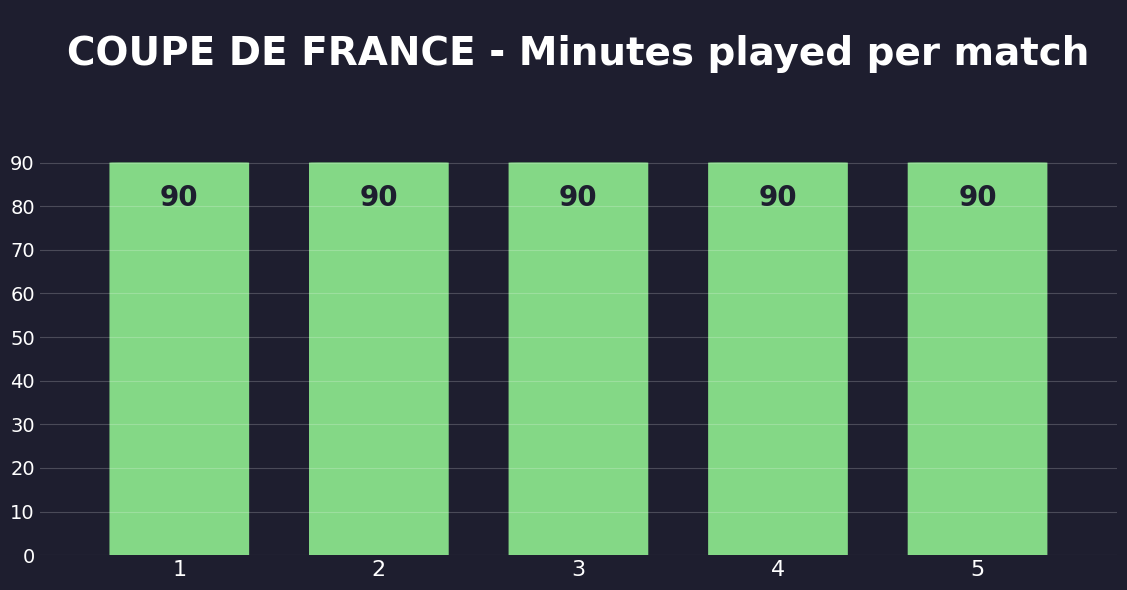

In [75]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Configuration des couleurs
bg_color = '#1e1e2f'  # Fond sombre bleu-gris
primary_color = '#ffffff'  # Texte blanc
bar_color = '#90ee90'  # Vert clair pour les barres
highlight_color = '#ff6f61'  # Rouge-corail pour les highlights

# Données - Junior Diaz a joué 90 minutes à chaque match
match_days = range(1, 6)  # 5 matchs de Coupe de France
minutes = [90] * 5  # 90 minutes à chaque match

# Configuration de la figure
fig, ax = plt.subplots(figsize=(12, 6), facecolor=bg_color)
ax.set_facecolor(bg_color)

# Largeur des barres (plus large pour ressembler à l'image)
bar_width = 0.6

# Création des barres avec coins arrondis
for i, (day, min_played) in enumerate(zip(match_days, minutes)):
    # Créer un rectangle avec coins arrondis
    rect = patches.FancyBboxPatch(
        (day - bar_width/2, 0),  # position (x, y)
        bar_width,  # largeur
        min_played,  # hauteur
        boxstyle="round,pad=0.05",  # coins arrondis
        facecolor=bar_color,
        edgecolor='none',
        alpha=0.9
    )
    ax.add_patch(rect)
    
    # Ajouter les valeurs à l'intérieur de chaque barre, tout en haut
    ax.text(day, min_played - 5, str(min_played),
            ha='center', va='top', color=bg_color,
            fontsize=20, fontweight='bold')

# Titre
ax.text(3, 115, "COUPE DE FRANCE - Minutes played per match",
        ha='center', va='center', color=primary_color,
        fontsize=28, fontweight='bold')

# Configuration des axes
ax.set_xlim(0.3, 5.7)  # Ajusté pour 5 matchs
ax.set_ylim(0, 125)

# Axe X - Matchs
ax.set_xticks(match_days)
ax.set_xticklabels([str(d) for d in match_days],
                   color=primary_color, fontsize=16)

# Axe Y - Minutes
ax.set_yticks(range(0, 100, 10))
ax.set_yticklabels([str(y) for y in range(0, 100, 10)],
                   color=primary_color, fontsize=14)

# Style des axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Grille horizontale subtile
ax.grid(True, axis='y', linestyle='-', alpha=0.2, color=primary_color)
ax.grid(False, axis='x')

# Supprimer les traits de l'axe X et Y
ax.tick_params(axis='x', length=0)
ax.tick_params(axis='y', length=0)

# Ajuster l'espacement
plt.tight_layout()
plt.show()

In [16]:
df_players[df_players["player"] == "Junior Diaz"] 

league season    team       player nation pos age  born  \
                                                                    
507  FRA-Ligue-2   2425  Troyes  Junior Diaz    CIV  DF  21  2003   

    Playing Time         ... Performance                    Per 90 Minutes  \
              MP Starts  ...        G-PK PK PKatt CrdY CrdR            Gls   
507           34     34  ...           0  0     0    6    0            0.0   

                             
      Ast   G+A G-PK G+A-PK  
507  0.03  0.03  0.0   0.03  

[1 rows x 25 columns]

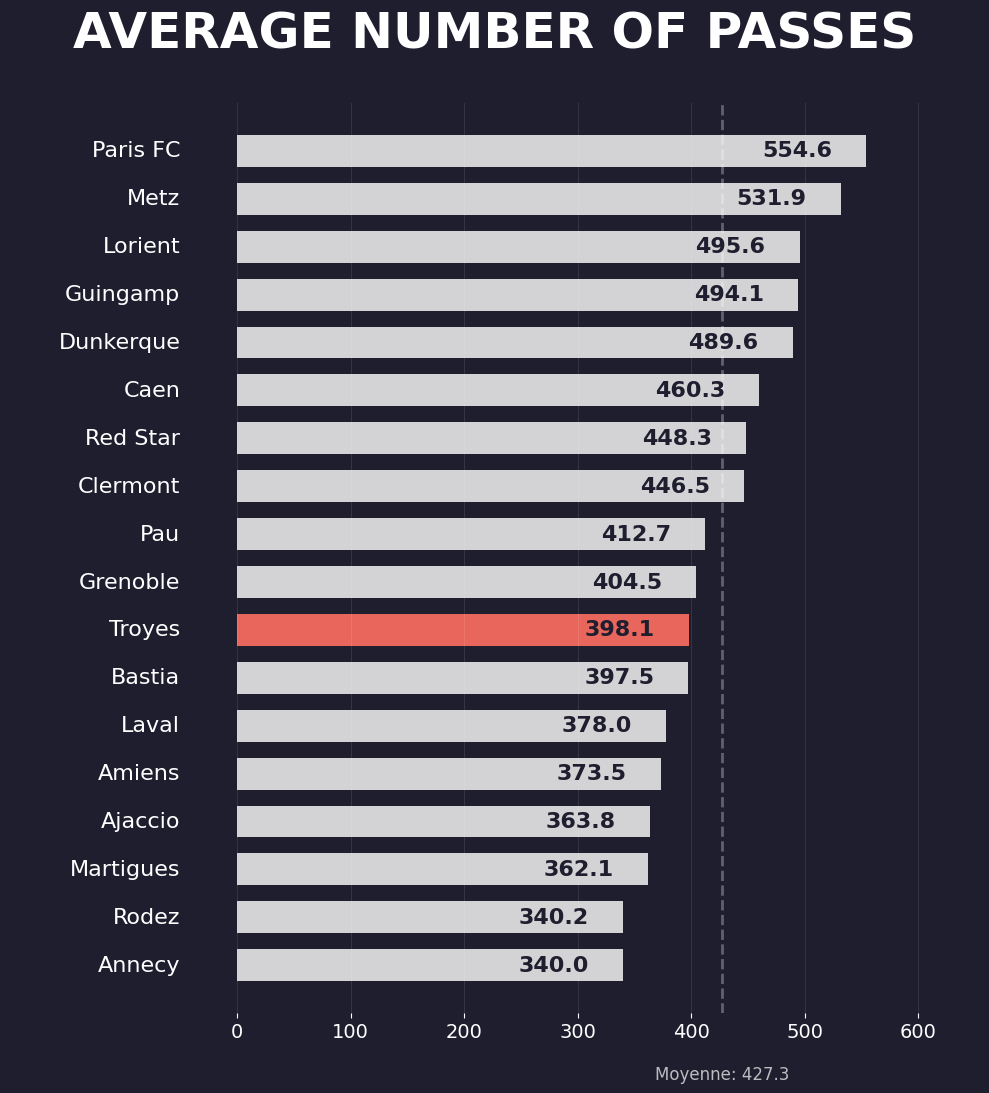

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import numpy as np

# Création du DataFrame à partir des données
data = {
    'equipe': [
        'Paris FC', 'Metz', 'Lorient', 'Guingamp', 'Dunkerque', 
        'Caen', 'Red Star', 'Clermont', 'Pau', 'Grenoble',
        'Troyes', 'Bastia', 'Laval', 'Amiens', 'Ajaccio',
        'Martigues', 'Rodez', 'Annecy'
    ],
    'passes_par_match': [
        554.6, 531.9, 495.6, 494.1, 489.6,
        460.3, 448.3, 446.5, 412.7, 404.5,
        398.1, 397.5, 378, 373.5, 363.8,
        362.1, 340.2, 340
    ]
}

df = pd.DataFrame(data)

# Configuration des couleurs
bg_color = '#1e1e2f'  # Fond sombre bleu-gris
primary_color = '#ffffff'  # Texte blanc
bar_color_default = '#e8e8e8'  # Barres grises claires
bar_color_highlight = '#ff6f61'  # Barre rouge-corail pour highlight

# Tri des données par passes par match (décroissant)
df_sorted = df.sort_values(by='passes_par_match', ascending=False)

# Configuration de la figure
fig, ax = plt.subplots(figsize=(10, 11), facecolor=bg_color)
ax.set_facecolor(bg_color)

# Configuration de la hauteur des barres
bar_height = 0.8
bar_spacing = 1.2  # Espacement entre les barres

# Nombre d'équipes
n_teams = len(df_sorted)

# Dessiner les barres
for i, (idx, row) in enumerate(df_sorted.iterrows()):
    equipe = row['equipe']
    value = row['passes_par_match']
    y_position = (n_teams - 1 - i) * bar_spacing
    
    # Choisir la couleur (mettre en surbrillance Troyes)
    color = bar_color_highlight if equipe == 'Troyes' else bar_color_default
    
    # Créer une barre simple
    rect = Rectangle((0, y_position - bar_height/2),
                    value,
                    bar_height,
                    facecolor=color,
                    edgecolor='none',
                    alpha=0.9)
    ax.add_patch(rect)
    
    # Ajouter le nom de l'équipe à gauche
    ax.text(-50, y_position, equipe,
            va='center', ha='right',
            color=primary_color,
            fontsize=16,
            fontweight='normal')
    
    # Ajouter la valeur sur la barre
    # Position adaptative selon la taille de la barre
    ax.text(value - 30, y_position, f"{value:.1f}",
            va='center', ha='right',
            color=bg_color,  # Texte sombre sur barre claire
            fontsize=16,
            fontweight='bold')


# Titre
plt.title("AVERAGE NUMBER OF PASSES", fontsize=36, fontweight='bold',
          color=primary_color, pad=40, loc='center')

# Configuration des axes
ax.set_ylim(-bar_spacing, n_teams * bar_spacing)
max_value = df_sorted['passes_par_match'].max()
ax.set_xlim(-200, max_value + 100)

# Désactiver les axes mais garder la grille
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Ajouter une grille verticale subtile
ax.set_xticks(range(0, int(max_value) + 100, 100))
ax.set_xticklabels([str(x) for x in range(0, int(max_value) + 100, 100)],
                   color=primary_color, fontsize=14)
ax.tick_params(axis='x', colors=primary_color, which='both', top=False, bottom=True)
ax.xaxis.set_ticks_position('bottom')

# Grille verticale
ax.grid(True, axis='x', linestyle='-', alpha=0.1, color=primary_color)

# Pas de grille ni de ticks sur l'axe Y
ax.set_yticks([])
ax.grid(False, axis='y')

# Position de l'axe X en bas
ax.xaxis.set_label_position('bottom')

# Ajouter une note sur la moyenne
moyenne = df_sorted['passes_par_match'].mean()
ax.axvline(x=moyenne, color=primary_color, linestyle='--', alpha=0.3, linewidth=2)
ax.text(moyenne, -2.5, f'Moyenne: {moyenne:.1f}', 
        ha='center', va='top', color=primary_color, fontsize=12, alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

df_sorted = df.sort_values(by=('Poss', ''), ascending=False).set_index(('team', ''))

fig, ax = plt.subplots(figsize=(6, 10), facecolor=bg_color)
ax.set_facecolor(bg_color)
ax.axis('off')

bar_height = 0.6
bar_color_default = primary_color
bar_color_highlight = secondary_color  # Optionnel

for i, (team, row) in enumerate(df_sorted.iterrows()):
    value = row[('Poss', '')]
    color = bar_color_highlight if team == 'Troyes' else bar_color_default

    ax.barh(i, value, height=bar_height, color=color, edgecolor='none')

    ax.text(-2, i, team, va='center', ha='right', color=primary_color, fontsize=12)
    ax.text(value + 1, i, f"{value:.1f} %", va='center', color=primary_color, fontsize=12)

plt.title("BALL POSSESSION", fontsize=24, fontweight='bold', color=primary_color, pad=20)
ax.set_ylim(-1, len(df_sorted))
ax.set_xlim(-20, df_sorted[('Poss', '')].max() + 10)

ax.invert_yaxis()  # <-- inverser l’axe y ici

plt.tight_layout()
plt.show()
plt.savefig("test.png")
